In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [4]:
# import data
data = pd.read_excel('titanic.xlsx')
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [5]:
#Mengecek head, tail, sample, info lalu mengobservasi apa yang bisa diperoleh dari data
data.head() #Untuk melihat struktur data awal data yakni kolom apa aja yang ada, bentuk datanya gimana, tipe-tipe nilai awal.



,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [6]:
data.tail() #Untuk mengecek apakah bagian akhir data konsisten, atau mungkin ada data yang kosong/error.

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [7]:
data.sample(5) #Untuk melihat contoh baris acak, cek keunikan atau variasi dalam data.

,survived,name,sex,age
270,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0
213,1,"Newell, Miss. Madeleine",female,31.0
150,0,"Harrison, Mr. William",male,40.0
131,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.0
330,0,"Ashby, Mr. John",male,57.0


Observations:
1. Terdapat 2 kolom yakni name dan sex yang bukan numerik
2. Kolom sex terlihat terdapat 2 jenis yang berbeda yakni female dan male, type datanya objek
3. Kolom survived biner yang bernilai (0,1)
4. Kolom name juga bertipe data objek, cukup konsisten mengandung gelar Mr. dan Miss.
5. Tidak terdapat cacat yang jelas dalam data, semua terlihat konsisten

In [8]:
data.info() #Untuk mencari tahu apakah ada missing values, data kosong, atau data dengan tipe yang salah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Observation:
1. Data berisi 4 kolom dengan 500 baris
2. Kolom age memiliki nilai yang hilang yakni sebanyak 49, mereka akan ditangani nanti
3. Semua type terlihat sesuai dengan nama kolom yang sesuai

# Statistical Summary

In [9]:
data.columns #Untuk mengecek nama kolomnya

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [10]:
#Mengelompokkan nama kolom berdasarkan jenisnya
#Ini akan membuat kita lebih mudah
categoricals = ['name', 'sex']

numericals = ['survived', 'age']


In [11]:
#Statistical Summary untuk data numerik
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


Observation:
1. Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom, pada nilai min kolom age 0.666700 itu berarti 0.666700 x 12 = 8 bulan
2. Nilai rata-rata pada kolom age mengindikasi distribusi yang cukup simetris
3. Kolom survived adalah biner karena nilainya 0 atau 1, tidak perlu disimpulkan simetrisitasnya hanya perlu mengecek tingkat keseimbangannya.


In [12]:
#Statistical Summary untuk data kategori
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


Observation:
1. Kolom sex memiliki 2 nilai unik, 'male' dan female
2. Kolom name memiliki 499 nilai unik berarti dari 500 data terdapat 2 data yang kolom name nya sama
3. Terdapat 2 nama yang sama yakni "Eustis, Miss. Elizabeth Mussey"
4. Sebanyak 288 berjenis kelamin male, sisanya female

In [13]:
categoricals

['name', 'sex']

In [14]:
#Menunjukkan jumlah nilai yang tepat
#Kode ini sangat berguna jika kita memiliki banyak kolom kategorik
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1

Observation:
1. Terdapat dua data dengan nama yang sama, yaitu “Eustis, Nona. Elizabeth Mussey”.
2. Penumpang laki-laki berjumlah 288, lebih banyak dibanding perempuan yang berjumlah 212, menunjukkan ketimpangan gender dalam data.

In [15]:
for col in numericals:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     

Observation:
1. Data menunjukkan bahwa 270 penumpang selamat, 230 penumpang yangyang tidak selamat. Hal ini menunjukkan distribusi yang relatif seimbang.
2. Usia 24, 30, dan 36 tahun paling sering muncul di antara
penumpang, yang mengindikasikan usia-usia ini lebih
umum di atas kapal.

# Handling Duplicate

In [16]:
len(data)

500

In [17]:
len(data.drop_duplicates()) #Menghitung jumlah baris setelah semua baris duplikat dihapus

499

In [18]:
len(data.drop_duplicates()) / len(data)
#Jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

0.998

In [19]:
list(data.columns)

['survived', 'name', 'sex', 'age']

In [20]:
# Langkah 1: Ambil baris duplikat (termasuk yang asli)
duplicates = data[data.duplicated(keep=False)]

In [21]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [22]:
duplicates.groupby(list(data.columns)).size() #Untuk melihat isi baris duplikat dan seberapa sering masing-masing baris muncul.

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [23]:
duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah duplikat')
#Untuk menampilkan isi baris duplikat dari DataFrame dan berapa kali baris tersebut muncul sebagai duplikat, lalu dikemas jadi DataFrame yang rapi.


,survived,name,sex,age,jumlah duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [24]:
#Langkah 2: Hitung frekuensi kemunculan tiap baris duplikat
duplicate_counts = duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah_duplikat')

#Langkah 3: Urutkan berdasarkan jumlah duplikat
sorted_duplicates = duplicate_counts.sort_values(by='jumlah_duplikat', ascending=False)

#Tampilkan hasil
print("Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:")
sorted_duplicates

Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:


,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [25]:
#Menangani Drop duplicate
data = data.drop_duplicates()


In [26]:
len(data.drop_duplicates()) / len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

Telah dihandling drop duplikat

## Missing Value Handling

In [27]:
# Cek jumlah data duplikat (seluruh baris yang sama persis)
duplikat = data.duplicated()
jumlah_duplikat = duplikat.sum()

print(f"Jumlah baris duplikat: {jumlah_duplikat}")

# Kalau ada duplikat, tampilkan contoh barisnya
if jumlah_duplikat > 0:
    print("\nContoh data duplikat:")
    print(df[duplikat].head())

    # Hapus duplikat jika memang tidak dibutuhkan
    df_bersih = df.drop_duplicates()
    print(f"\nSetelah menghapus duplikat, jumlah data menjadi: {len(df_bersih)}")

else:
    print("Tidak ada data duplikat yang ditemukan.")

Jumlah baris duplikat: 0
Tidak ada data duplikat yang ditemukan.


In [28]:
#Mengidentifikasi Missing Value (Data dengan Nilai Kosong)
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [29]:
data.isnull().sum() #Untuk mengecek jumlah nilai kosong (missing values / NaN) di setiap kolom pada DataFrame

,0
survived,0
name,0
sex,0
age,49


In [30]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [31]:
total_rows = len(data)
total_rows

499

In [32]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [33]:
#Persentase
total_rows = len(data)

#Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


Persentase nilai yang hilang di bawah 20% sehingga ditangani secara numerik dengan median, kategorikal dengan modus. Namun tipe data kategorikal tidak memiliki nilai yang hilang.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [35]:
data['age'].median()

35.0

In [36]:
# Menangani nilai yang hilang untuk EDA, tanpa pemisahan
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

<ipython-input-36-07b4033b190b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-36-07b4033b190b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [37]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


Misssing value telah berhasil ditangani

## Data Visualization

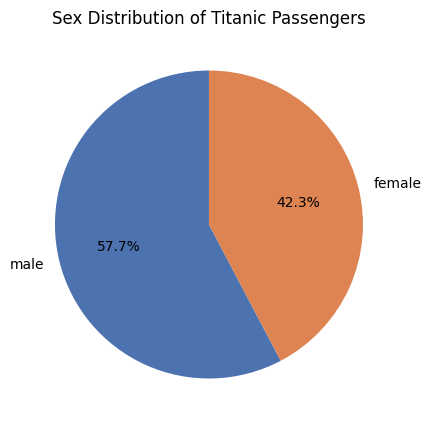

In [39]:
# Pie chart for the distribution of Sex with pastel colors
sex_counts = data['sex'].value_counts()
colors = sns.color_palette("deep")[:len(sex_counts)]  # Ganti dari pastel ke deep

plt.figure(figsize=(5, 5))
sex_counts.plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sex Distribution of Titanic Passengers')
plt.ylabel('')  # Remove y label for a cleaner look
plt.show()

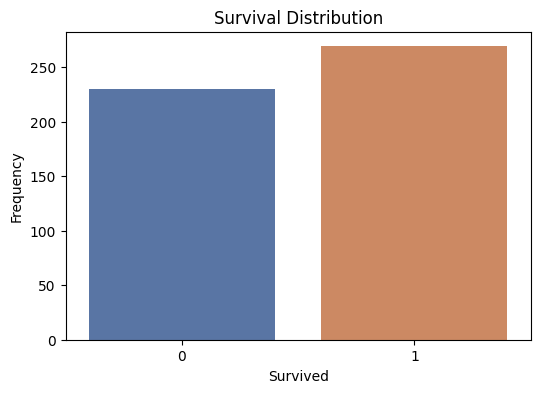

In [41]:
# Histogram for the distribution of Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', hue='survived', data=data, palette='deep', legend=False)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

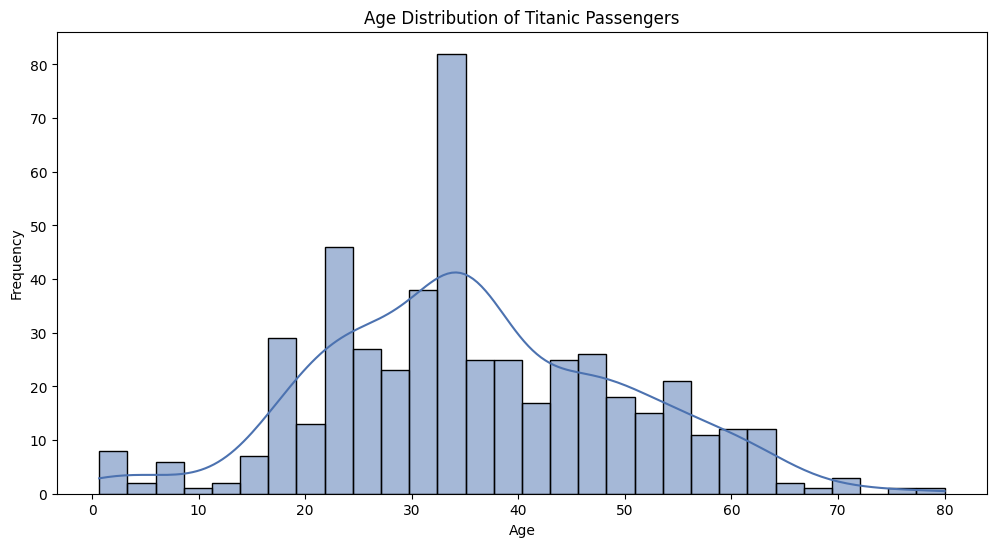

In [63]:
# Histogram for the distribution of Age
plt.figure(figsize=(12, 6))
color = sns.color_palette('deep')[0]  # Take the first color from the pastel palette
sns.histplot(data['age'].dropna(), kde=True, bins=30, color=color)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

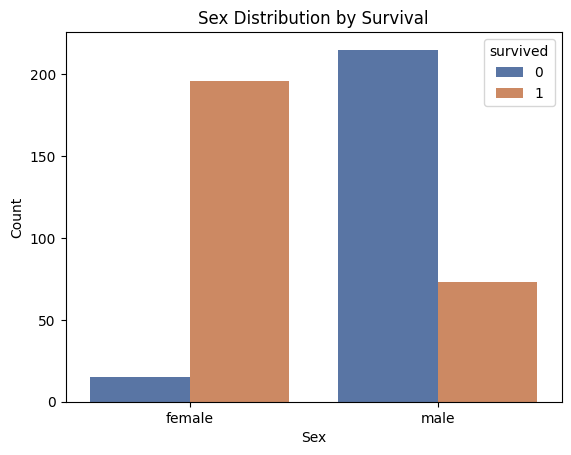

In [43]:
# Count plot for sex distribution by survival status
sns.countplot(data=data, x='sex', hue='survived', palette='deep', legend=True, hue_order=[0, 1])
plt.title('Sex Distribution by Survival')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

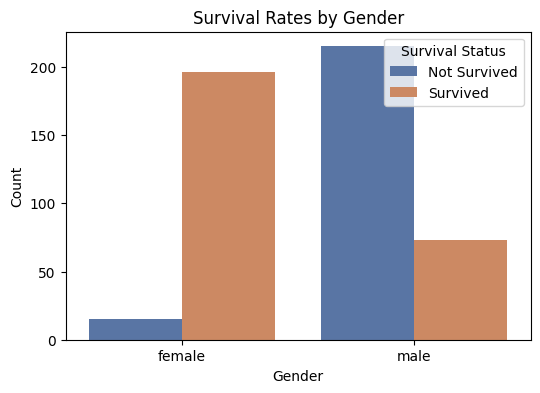

In [45]:
# Count plot for categorical feature 'sex' with deep color palette
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='sex', hue='survived', palette='deep', legend=True, hue_order=[0, 1])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Rename legend labels
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
plt.show()

<ipython-input-62-39c2e66f530e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values, palette='deep')


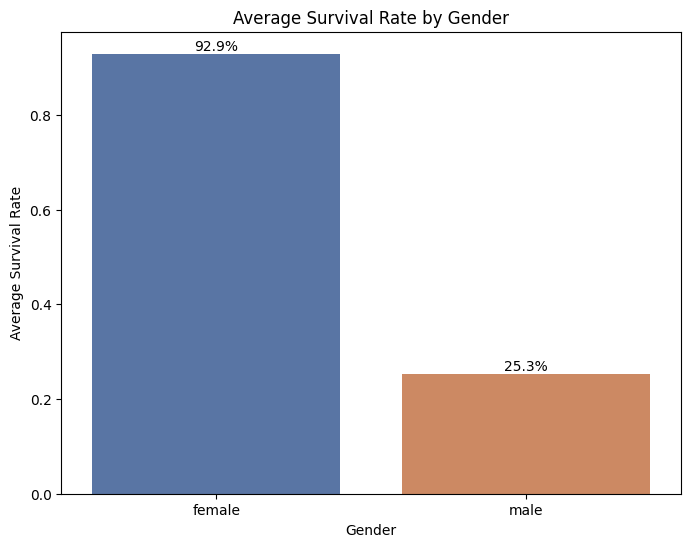

In [62]:
# Calculate average survival rate by gender
survival_rate_by_gender = data.groupby('sex')['survived'].mean()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values, palette='deep')
plt.title('Average Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Survival Rate')

# Add percentage labels on top of each bar
for i, rate in enumerate(survival_rate_by_gender.values):
    plt.text(i, rate, f'{rate*100:.1f}%', ha='center', va='bottom')

plt.show()


### Feature Engineering

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
#Membuat instance LabelEncoder
le = LabelEncoder()

#Mengubah kolom 'Sex' menjadi numerik
data['sex'] = le.fit_transform(data['sex'])

In [69]:
#Menampilkan 5 baris pertama untuk melihat perubahan
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000
1,1,"Allison, Master. Hudson Trevor",1,0.9167
2,0,"Allison, Miss. Helen Loraine",0,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000


In [76]:
# Select relevant features
features = ['sex', 'age']
X = data[features]  # Feature dataset
y = data['survived']  # Target column

In [77]:
X

,sex,age
0,0,29.0000
1,1,0.9167
2,0,2.0000
3,1,30.0000
4,0,25.0000
5,1,48.0000
6,0,63.0000
7,1,39.0000
8,0,53.0000
9,1,71.0000


In [78]:
y

,survived
0,1
1,1
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,0


In [79]:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler instance
scaler = StandardScaler()

# Scale the numerical feature safely using .loc
X.loc[:, 'age'] = scaler.fit_transform(X[['age']])

# Display the scaled features
X.head()

,sex,age
0,0,-0.485042
1,1,-2.490745
2,0,-2.413376
3,1,-0.413622
4,0,-0.770721


In [80]:
# Mengimpor library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train

,sex,age
56,1,0.014897
227,0,-0.984980
280,1,1.300453
487,1,-0.842141
220,0,-0.984980
449,1,0.014897
423,1,-0.842141
377,1,-0.842141
25,1,-0.770721
229,0,-1.342079


In [82]:
y_test

,survived
461,1
73,1
231,1
175,0
237,0
426,0
155,1
55,1
322,1
9,0


In [83]:
# Import KNN Classifier dari sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
# Inisialisasi model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)  # Kita mulai dengan k=5, bisa di-tune nanti

# Melatih model KNN dengan data latih
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
# Prediksi dengan data uji
y_pred_knn = model_knn.predict(X_test)

In [86]:
# Evaluasi hasil
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.82


In [110]:
# Confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

Confusion Matrix:
[[34  5]
 [13 48]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        39
           1       0.91      0.79      0.84        61

    accuracy                           0.82       100
   macro avg       0.81      0.83      0.82       100
weighted avg       0.83      0.82      0.82       100



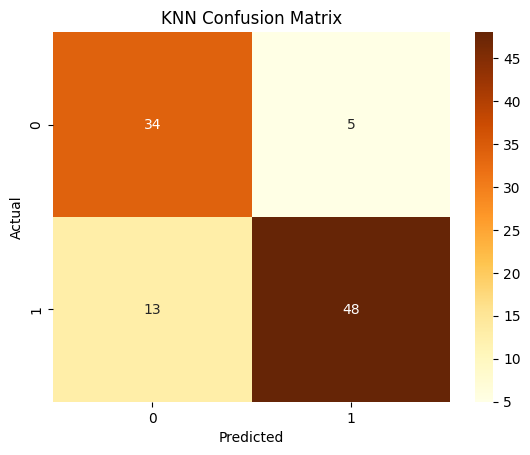

In [88]:
# Visualisasi confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

In [89]:
# Import SVC dari sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
# Inisialisasi model SVM
model_svm = SVC(kernel='linear', random_state=42)  # Kita mulai dengan kernel linear

# Melatih model SVM dengan data latih
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [91]:
# Prediksi dengan data uji
y_pred_svm = model_svm.predict(X_test)

In [92]:
# Evaluasi hasil
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.84


In [109]:
# Confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print(" SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Confusion Matrix:
[[37  2]
 [14 47]]
 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        39
           1       0.96      0.77      0.85        61

    accuracy                           0.84       100
   macro avg       0.84      0.86      0.84       100
weighted avg       0.87      0.84      0.84       100



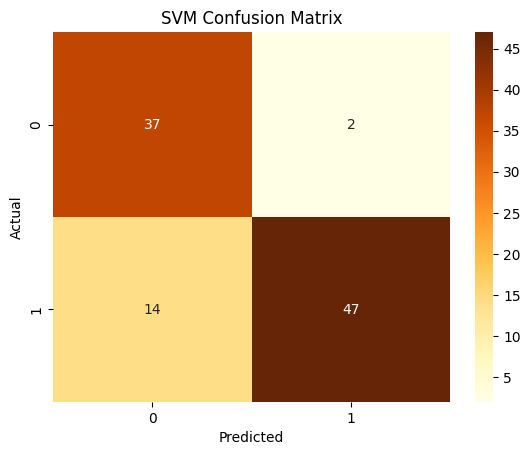

In [111]:
# Visualisasi confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [112]:
# Import library DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [113]:
# Inisialisasi model DecisionTree
model_dt = DecisionTreeClassifier(random_state=42)

# Melatih model DecisionTree dengan data latih
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [114]:
# Prediksi dengan data uji
y_pred_dt = model_dt.predict(X_test)

In [115]:
# Evaluasi hasil
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.81


In [117]:
# Confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("DT Classification Report:")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
[[34  5]
 [14 47]]
DT Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        39
           1       0.90      0.77      0.83        61

    accuracy                           0.81       100
   macro avg       0.81      0.82      0.81       100
weighted avg       0.83      0.81      0.81       100



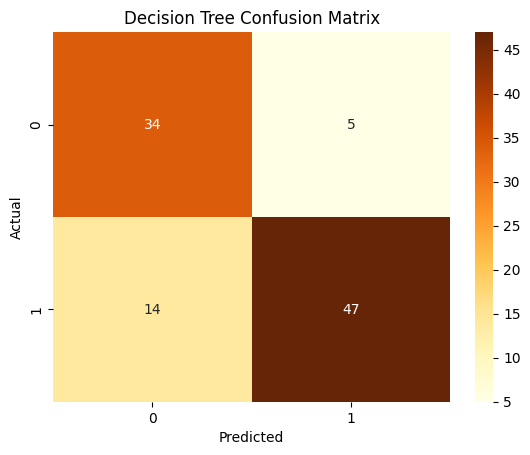

In [118]:
# Visualisasi confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()